In [25]:
# My little betfair quotebot

'''
This follows the same structure as FXQuoteBot and RandomRequestBot. Probably not worth having anything more general,
especially because the external APIs are a bit specific.
'''

import requests
import json
import pandas as pd
import time


%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
#baseurl = 'https://blocmarket.herokuapp.com/'
# baseurl = 'http://127.0.0.1:5000/'
baseurl = 'http://127.0.0.1:7000/'

In [175]:
# Betfair example.

# Get BBO for a betfair market
# Nicer API wrapping here: https://github.com/betfair/API-NG-sample-code/blob/master/python/ApiNgDemoJsonRpc.py

#1. Get session token

# Note betfair discourages doing it this way. 

'''
curl -H "Accept: application/json" -H "X-Application: alpinechickenbetfair" -X POST -d 'username=alpinechicken&password=<password>' https://identitysso.betfair.com/api/login

curl -k -i -H "Accept: application/json" -H "X-Application: alpinechickenbetfair" -X POST -d 'username=alpinechicken&password=<password>' https://identitysso.betfair.com/api/login


# Gets something like:

HTTP/1.1 200 OK
Content-Type: application/json
Content-Length: 119
Date: Sun, 10 Feb 2019 01:55:22 GMT
Server: Betfair

{"token":"ou5T85YN39lQkJagYBlNk/avRDR3s1KA+tJqda1eB2Y=","product":"alpinechickenbetfair","status":"SUCCESS","error":""} 

'''

sessionToken = 'CMS/qWASGRywt9zQQ1byM88HMPUk3mec2A6K7ymxCq8='

#2. Get application keys
# Instructions here: https://docs.developer.betfair.com/display/1smk3cen4v3lu3yomq5qye0ni/Application+Keys#ApplicationKeys-HowtoCreateAnApplicationKey
# Note the keys are already set up so use getDeveloperAppKeys (if they're not set up use createDeveloperAppKeys)

demoKey = 'iw8UsiHCP1GSs213'
liveKey = '<live key>'
appKey = demoKey

# March Brexit: 1.130766060 (betfair market number)


In [191]:
# List event types using REST API

resturl = "https://api.betfair.com/exchange/betting/rest/v1.0/"
 
betfairheaders = { 'X-Application' : appKey, 'X-Authentication' : sessionToken ,'content-type' : 'application/json' }
 
json_req='{"filter":{ }}'
 
url = resturl + "listEventTypes/"
 
response = requests.post(url, data=json_req, headers=betfairheaders)
 
 
response.json()

[{'eventType': {'id': '1', 'name': 'Soccer'}, 'marketCount': 16593},
 {'eventType': {'id': '2', 'name': 'Tennis'}, 'marketCount': 1980},
 {'eventType': {'id': '3', 'name': 'Golf'}, 'marketCount': 33},
 {'eventType': {'id': '4', 'name': 'Cricket'}, 'marketCount': 486},
 {'eventType': {'id': '5', 'name': 'Rugby Union'}, 'marketCount': 148},
 {'eventType': {'id': '1477', 'name': 'Rugby League'}, 'marketCount': 26},
 {'eventType': {'id': '6', 'name': 'Boxing'}, 'marketCount': 42},
 {'eventType': {'id': '7', 'name': 'Horse Racing'}, 'marketCount': 1012},
 {'eventType': {'id': '8', 'name': 'Motor Sport'}, 'marketCount': 2},
 {'eventType': {'id': '27454571', 'name': 'Esports'}, 'marketCount': 158},
 {'eventType': {'id': '10', 'name': 'Special Bets'}, 'marketCount': 61},
 {'eventType': {'id': '998917', 'name': 'Volleyball'}, 'marketCount': 23},
 {'eventType': {'id': '11', 'name': 'Cycling'}, 'marketCount': 1},
 {'eventType': {'id': '2152880', 'name': 'Gaelic Games'}, 'marketCount': 59},
 {'eve

In [177]:
betfairurl = "https://api.betfair.com/exchange/betting/json-rpc/v1"

#marketId = '1.130766060' # Brexit
betfairMarketId= '1.154882219' # India v Australia 24/April
demoKey = 'iw8UsiHCP1GSs213'
liveKey = '<live key>'
appKey = demoKey


In [192]:
market_book_req = '{"jsonrpc": "2.0", "method": "SportsAPING/v1.0/listMarketBook", "params": {"marketIds":["' + betfairMarketId + '"],"priceProjection":{"priceData":["EX_BEST_OFFERS"]}}, "id": 1}'
response = requests.get(betfairurl, data=market_book_req, headers=header)

In [193]:
response.json()

{'jsonrpc': '2.0',
 'result': [{'marketId': '1.154882219',
   'isMarketDataDelayed': True,
   'status': 'OPEN',
   'betDelay': 0,
   'bspReconciled': False,
   'complete': True,
   'inplay': False,
   'numberOfWinners': 1,
   'numberOfRunners': 2,
   'numberOfActiveRunners': 2,
   'lastMatchTime': '2019-02-23T04:04:40.549Z',
   'totalMatched': 15234.1,
   'totalAvailable': 110426.96,
   'crossMatching': True,
   'runnersVoidable': False,
   'version': 2636492852,
   'runners': [{'selectionId': 414464,
     'handicap': 0.0,
     'status': 'ACTIVE',
     'lastPriceTraded': 1.59,
     'totalMatched': 0.0,
     'ex': {'availableToBack': [{'price': 1.57, 'size': 217.73},
       {'price': 1.56, 'size': 360.92},
       {'price': 1.55, 'size': 280.98}],
      'availableToLay': [{'price': 1.59, 'size': 4354.38},
       {'price': 1.6, 'size': 210.02},
       {'price': 1.61, 'size': 114.78}],
      'tradedVolume': []}},
    {'selectionId': 16606,
     'handicap': 0.0,
     'status': 'ACTIVE',
   

In [57]:
'''
response.json() returns something like:

{'jsonrpc': '2.0',
 'result': [{'marketId': '1.130766060',
   'isMarketDataDelayed': True,
   'status': 'OPEN',
   'betDelay': 0,
   'bspReconciled': False,
   'complete': True,
   'inplay': False,
   'numberOfWinners': 1,
   'numberOfRunners': 2,
   'numberOfActiveRunners': 2,
   'lastMatchTime': '2019-02-10T03:49:44.097Z',
   'totalMatched': 4430277.12,
   'totalAvailable': 78495.88,
   'crossMatching': True,
   'runnersVoidable': False,
   'version': 2607147208,
   'runners': [{'selectionId': 1108298,
     'handicap': 0.0,
     'status': 'ACTIVE',
     'lastPriceTraded': 3.65,
     'totalMatched': 0.0,
     'ex': {'availableToBack': [{'price': 3.55, 'size': 47.24},
       {'price': 3.5, 'size': 2518.88},
       {'price': 3.45, 'size': 41.34}],
      'availableToLay': [{'price': 3.65, 'size': 689.57},
       {'price': 3.75, 'size': 1208.76},
       {'price': 3.8, 'size': 634.6}],
      'tradedVolume': []}},
    {'selectionId': 1108299,
     'handicap': 0.0,
     'status': 'ACTIVE',
     'lastPriceTraded': 1.38,
     'totalMatched': 0.0,
     'ex': {'availableToBack': [{'price': 1.38, 'size': 1702.34},
       {'price': 1.37, 'size': 1578.01},
       {'price': 1.36, 'size': 3514.0}],
      'availableToLay': [{'price': 1.39, 'size': 120.66},
       {'price': 1.4, 'size': 6297.2},
       {'price': 1.41, 'size': 2294.27}],
      'tradedVolume': []}}]}],
 'id': 1}

'''
response.json()

{'jsonrpc': '2.0',
 'result': [{'marketId': '1.154882219',
   'isMarketDataDelayed': True,
   'status': 'OPEN',
   'betDelay': 0,
   'bspReconciled': False,
   'complete': True,
   'inplay': False,
   'numberOfWinners': 1,
   'numberOfRunners': 2,
   'numberOfActiveRunners': 2,
   'lastMatchTime': '2019-02-16T04:12:36.965Z',
   'totalMatched': 644.12,
   'totalAvailable': 86926.58,
   'crossMatching': True,
   'runnersVoidable': False,
   'version': 2636492852,
   'runners': [{'selectionId': 414464,
     'handicap': 0.0,
     'status': 'ACTIVE',
     'lastPriceTraded': 1.53,
     'totalMatched': 0.0,
     'ex': {'availableToBack': [{'price': 1.53, 'size': 116.96},
       {'price': 1.5, 'size': 72.45},
       {'price': 1.49, 'size': 126.51}],
      'availableToLay': [{'price': 1.55, 'size': 99.62},
       {'price': 1.63, 'size': 154.9},
       {'price': 1.64, 'size': 175.0}],
      'tradedVolume': []}},
    {'selectionId': 16606,
     'handicap': 0.0,
     'status': 'ACTIVE',
     'tota

In [194]:
# Pull out bids/asks
bids = pd.DataFrame(response.json()['result'][0]['runners'][0]['ex']['availableToBack']) 
asks = pd.DataFrame(response.json()['result'][0]['runners'][0]['ex']['availableToLay']) 

In [195]:
bids

,price,size
0,1.57,217.73
1,1.56,360.92
2,1.55,280.98


In [196]:
asks

,price,size
0,1.59,4354.38
1,1.60,210.02
2,1.61,114.78


In [197]:
# Create a new user
url = baseurl +'createUser'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [198]:
# View response as json
response.json()

{'signingKey': '5e452e72e3b20c760ec5a861b0d03b26f35bdb2660d095c405ae39f892e4f7f4',
 'traderId': '4',
 'verifyKey': '35a13cf6db7a8681e3e11a26d3565f45d9114f6109d5b82311bd78135414733a'}

In [199]:
# Copy keys and traderid from response
sk = response.json()['signingKey']
vk = response.json()['verifyKey']
tId = int(response.json()['traderId'])


In [200]:
# Create a new market
mkRtId = 1
mkBrId = 1


createmarketurl = baseurl + 'createMarket'
content_makemarket = {"signingKey": sk,
                        "traderId": tId, 
                        "verifyKey": vk,
                        "marketRootId": mkRtId, 
                        "marketBranchId": mkBrId, 
                        "marketMin": 0,
                        "marketMax":1,
                        "marketDesc": 'India v Australia Sun 24 Feb, 13:30 betfair marketId:' + str(betfairMarketId) +' runnerId: 0' }
# Post market
response = requests.post(createmarketurl, data=json.dumps(content_makemarket), headers=headers)


In [201]:
# response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)
# View response as json
response.json()

{'allChecks': "{'inputChk': True, 'marketLimitChk': True, 'traderIdChk': True, 'marketId': '1', 'marketRangeChk': True, 'marketIndChk': True, 'sigChk': True, 'chainChk': True, 'ownerChk': False, 'timeChk': True}",
 'checks': 'False',
 'marketBranchId': 1,
 'marketId': 1,
 'marketMax': 1,
 'marketMin': 0,
 'marketRootId': 1,
 'traderId': 4}

In [203]:
# Save market id from response
mkId = response.json()['marketId']

1

In [204]:
# Create a trade
tradeurl = baseurl+'createTrade'

content_maketrade = {"signingKey": sk,
                     "traderId": tId,
                     "verifyKey": vk,
                     "marketId": int(mkId),
                     "price":1/min(asks['price']),
                     "quantity": 1}
response = requests.post(tradeurl, data=json.dumps(content_maketrade), headers=headers)

In [205]:
# View response as json
response.json()

{'allChecks': "{'inputChk': True, 'traderIdChk': True, 'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 1,
 'price': 0.6289308176100629,
 'quantity': 1,
 'traderId': 4}

In [206]:
content_makemarket

{'signingKey': '5e452e72e3b20c760ec5a861b0d03b26f35bdb2660d095c405ae39f892e4f7f4',
 'traderId': 4,
 'verifyKey': '35a13cf6db7a8681e3e11a26d3565f45d9114f6109d5b82311bd78135414733a',
 'marketRootId': 1,
 'marketBranchId': 1,
 'marketMin': 0,
 'marketMax': 1,
 'marketDesc': 'India v Australia Sun 24 Feb, 13:30 betfair marketId:1.154882219 runnerId: 0'}

In [207]:
stillPosting = True
i=0
prevMaxBid = 0
prevMinAsk = 0
while stillPosting:
    # Get BBO
    i+=1
    response = requests.get(betfairurl, data=market_book_req, headers=betfairheaders)
    bids = pd.DataFrame(response.json()['result'][0]['runners'][1]['ex']['availableToBack']) 
    asks = pd.DataFrame(response.json()['result'][0]['runners'][1]['ex']['availableToLay'])
    maxBid = max(bids['price'])
    minAsk = min(asks['price'])
    if (prevMaxBid == maxBid) and (prevMinAsk == minAsk):
        time.sleep(30)
    else:        
        # Convert to quote as probability
        myBid = 1/minAsk
        myAsk = 1/maxBid

        content_maketrade['price'] = myAsk
        content_maketrade['quantity'] =1
        response = requests.post(tradeurl, data=json.dumps(content_maketrade), headers=headers)
        # Make an offer
        content_maketrade['price'] = myBid
        content_maketrade['quantity'] = -1
        response = requests.post(tradeurl, data=json.dumps(content_maketrade), headers=headers)
        time.sleep(30)

        # Remove bid 
        content_maketrade['price'] = myBid
        content_maketrade['quantity'] =-1
        response = requests.post(tradeurl, data=json.dumps(content_maketrade), headers=headers)
        # Remove offer
        content_maketrade['price'] = myAsk
        content_maketrade['quantity'] = 1
        response = requests.post(tradeurl, data=json.dumps(content_maketrade), headers=headers)

        prevMaxBid = maxBid
        prevMinAsk = minAsk
        print('Price for iteration ' + str(i) + ' : ' + str(content_maketrade['price']))
    


Price for iteration 1 : 0.37037037037037035
Price for iteration 186 : 0.37037037037037035
Price for iteration 219 : 0.37037037037037035
Price for iteration 646 : 0.3676470588235294
Price for iteration 650 : 0.37037037037037035
Price for iteration 651 : 0.3676470588235294
Price for iteration 782 : 0.3676470588235294
Price for iteration 785 : 0.3676470588235294
Price for iteration 786 : 0.3676470588235294
Price for iteration 798 : 0.3676470588235294
Price for iteration 800 : 0.3676470588235294
Price for iteration 801 : 0.3676470588235294
Price for iteration 921 : 0.36496350364963503
Price for iteration 923 : 0.3676470588235294
Price for iteration 924 : 0.36496350364963503
Price for iteration 931 : 0.36496350364963503
Price for iteration 968 : 0.3623188405797102
Price for iteration 983 : 0.3623188405797102
Price for iteration 984 : 0.3623188405797102
Price for iteration 987 : 0.3623188405797102
Price for iteration 989 : 0.3623188405797102
Price for iteration 990 : 0.3623188405797102
Price

ConnectionError: HTTPSConnectionPool(host='api.betfair.com', port=443): Max retries exceeded with url: /exchange/betting/json-rpc/v1 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x11c8465c0>: Failed to establish a new connection: [Errno 51] Network is unreachable'))

In [22]:
response.json()

{'allChecks': "{'inputChk': True, 'traderIdChk': True, 'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 4,
 'price': 0.011764705882352941,
 'quantity': 1,
 'traderId': 4}

In [84]:
# Get summary for this market and plot

url = baseurl+'viewTradeSummary'
content = {'traderId': int(tId)}
response = requests.post(url, data=json.dumps(content), headers=headers, stream=True)
a = pd.read_json(response.json())
a = a[a['marketId'] == mkId]
a = a.set_index(a['timeStampUTC'])


Text(0.5, 1.0, 'Time series for market 1 / trader 1')

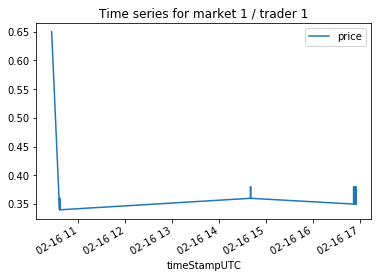

In [85]:
plt.figure(); a['price'].plot(); plt.legend(loc='best'); plt.title('Time series for market ' + str(mkId) + ' / trader ' +str(tId))

In [86]:
bids = a[a['quantity']<0]
asks = a[a['quantity']>0]

Text(0.5, 1.0, 'Time series for market 1 / trader 1')

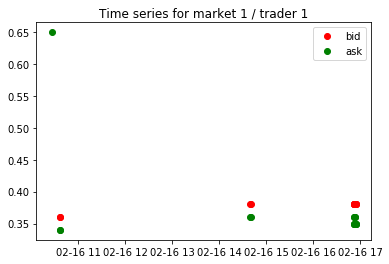

In [87]:
plt.figure(); 
plt.plot(bids['timeStampUTC'],bids['price'], 'ro');
plt.plot(asks['timeStampUTC'],asks['price'], 'go');
plt.legend(('bid', 'ask')); plt.title('Time series for market ' + str(mkId) + ' / trader ' +str(tId))
